In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
from src.trainer.evidential import getMassFcn2D

In [15]:
import pickle
# filename = 'log_evidential_dirichletplot1.pkl'

filenames = ['log_evidential_wmse_pa.pkl']

# filenames = ['log_evidential_wdice_mt.pkl']

filenames = ['log_wdice_pastdate_pa.pkl'] # wdice pa
filenames = ['log_evidential_wdice_mt_early_date.pkl', 'log_evidential_wdice_mt_early_date2.pkl'] # wdice mt early date


filenames = ['log_wdice_pastdate_pa.pkl']

filenames = [
    'log_evidential_dirichletplot1_pa.pkl',
    'log_evidential_dirichletplot2_pa.pkl'
             ]

filenames = ['log.pkl']

results = []
for filename in filenames:
    with open(filename, 'rb') as handle:
        results.extend(pickle.load(handle))
        print(len(results))
# print(results)
# print(len(results))

FileNotFoundError: [Errno 2] No such file or directory: 'log.pkl'

In [4]:
results[2]

{'other_uncertainty_metrics': {'sUEO': 0.35993511082351887, 'ece_score': 0},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': 0.0,
   'alpha': array([168.6423,   1.    ,   1.    ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([1.       , 7.0894217, 1.       ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': 1.0,
   'alpha': array([1.      , 2.757742, 1.      ], dtype=float32)}],
 'uncertainty_result': {'metrics': {'p

In [5]:
results[-1]

{'other_uncertainty_metrics': {'sUEO': 0.41852756084078635,
  'ece_score': 0.10091987545327072},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': 0.0,
   'alpha': array([33.42052,  1.     ,  1.     ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1.       , 1.5123345, 1.       ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([ 1.      , 13.133177,  1.      ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([1.       , 4.3822217, 1.       ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': 1.0,
   'alpha': array([ 1.      , 10.556276,  1.

In [6]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))
            print("f1: {}".format(result['uncertainty_result']['metrics']['f1']))
            print("f1_L: {}, f1_H: {}, f1_audit: {}".format(
                result['uncertainty_result']['metrics']['f1_L'],
                result['uncertainty_result']['metrics']['f1_H'],
                result['uncertainty_result']['metrics_audited']['f1']))
            print("UEO",result['uncertainty_result']['metrics']['UEO'])


            
            # plt.figure()
            # getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)

exp_id, 194
idx: 0, other uncertainty metrics: {'sUEO': 0.3845722890780702, 'ece_score': 0}
f1: 77.05
f1_L: [0.91706947], f1_H: [0.27678233], f1_audit: [0.9439003]
UEO [0.12643491]
exp_id, 195
idx: 1, other uncertainty metrics: {'sUEO': 0.4216257755386668, 'ece_score': 0}
f1: 78.78
f1_L: [0.92758209], f1_H: [0.43526722], f1_audit: [0.953481]
UEO [0.12473837]
exp_id, 196
idx: 2, other uncertainty metrics: {'sUEO': 0.35993511082351887, 'ece_score': 0}
f1: 79.16
f1_L: [0.90980339], f1_H: [0.42183252], f1_audit: [0.93694084]
UEO [0.11217199]
exp_id, 197
idx: 3, other uncertainty metrics: {'sUEO': 0.39539940415724506, 'ece_score': 0}
f1: 76.28
f1_L: [0.9205716], f1_H: [0.40519693], f1_audit: [0.95225731]
UEO [0.13585597]
exp_id, 198
idx: 4, other uncertainty metrics: {'sUEO': 0.053239067948908085, 'ece_score': 0.5106524568504512}
f1: 80.65
f1_L: [0.82754825], f1_H: [nan], f1_audit: [0.83608502]
UEO [0.02034325]
exp_id, 199
idx: 5, other uncertainty metrics: {'sUEO': 0.42596983253086407, 'ec

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
results

[{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0},
  'snippet_poi_results': [{'snippet_id': 0,
    'coords': [550, 550],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)},
   {'snippet_id': 0,
    'coords': [210, 610],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [207, 617],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [800, 200],
    'reference': 1,
    'predicted': 1.0,
    'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [550, 115],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [430, 950],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)}],
  'un

In [8]:
## ensemble load
filename_ensemble = 'log_ensemble_pa.pkl'

with open(filename_ensemble, 'rb') as handle:
    results_ensemble = pickle.load(handle)


In [9]:
len(results_ensemble)

6

In [10]:
results_ensemble[0]

{'snippet_id': 0,
 'coords': [550, 550],
 'reference': 0,
 'predicted': array([[2.0551834e-04],
        [8.4451557e-08],
        [2.4894035e-07],
        [8.6231870e-07],
        [1.9666179e-04],
        [7.7832292e-09],
        [1.1743788e-05],
        [1.2044254e-05],
        [2.4744712e-10],
        [4.6263744e-07]], dtype=float32)}

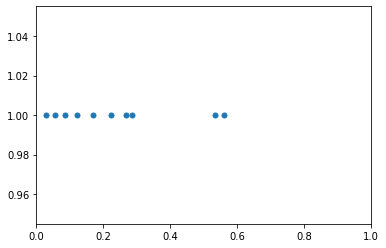

In [11]:

a = results_ensemble[4]['predicted']
y = np.ones(np.shape(a))   # Make all y values the same
plt.plot(a,y,'.',ms = 10)  # Plot a line at each location specified in a
plt.xlim([0, 1])
# plt.axis('off')
plt.show()

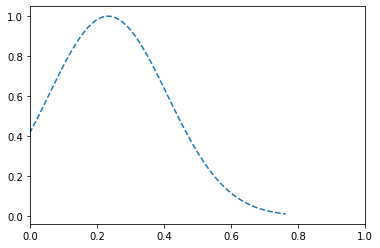

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
a = results_ensemble[4]['predicted']

def plot_norm_pdf(a):
    mu = np.mean(a)
    variance = np.var(a)
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    pdf = pdf/np.max(pdf)
    plt.plot(x, pdf,'--')
    plt.xlim([0, 1])
    # plt.show()

plot_norm_pdf(a)


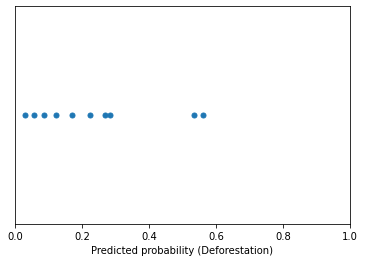

In [13]:

def plot_points(a):
    y = np.ones(np.shape(a))*0.5   # Make all y values the same
    plt.plot(a,y,'.',ms = 10)  # Plot a line at each location specified in a
    plt.xlim([0, 1])

    plt.xlabel('Predicted probability (Deforestation)')
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
        
    # plt.axis('off')
    # plt.show()
    # plt.clf()
plot_points(a)


exp_id, 194
idx: 0, other uncertainty metrics: {'sUEO': 0.3845722890780702, 'ece_score': 0}
exp_id, 195
idx: 1, other uncertainty metrics: {'sUEO': 0.4216257755386668, 'ece_score': 0}
exp_id, 196
idx: 2, other uncertainty metrics: {'sUEO': 0.35993511082351887, 'ece_score': 0}
exp_id, 197
idx: 3, other uncertainty metrics: {'sUEO': 0.39539940415724506, 'ece_score': 0}
exp_id, 198
idx: 4, other uncertainty metrics: {'sUEO': 0.053239067948908085, 'ece_score': 0.5106524568504512}
exp_id, 199
idx: 5, other uncertainty metrics: {'sUEO': 0.42596983253086407, 'ece_score': 0.05624375500343817}
exp_id, 200
idx: 6, other uncertainty metrics: {'sUEO': 0.24002797100218876, 'ece_score': 0.09926059301226876}
exp_id, 201
idx: 7, other uncertainty metrics: {'sUEO': 0.37593417277851976, 'ece_score': 0.07479207562590515}
exp_id, 202
idx: 8, other uncertainty metrics: {'sUEO': 0.3972462833082261, 'ece_score': 0.08061046323488832}
exp_id, 203
idx: 9, other uncertainty metrics: {'sUEO': 0.41852756084078635,

d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return self._coef * np.multiply.reduce([xx ** (aa - 1)


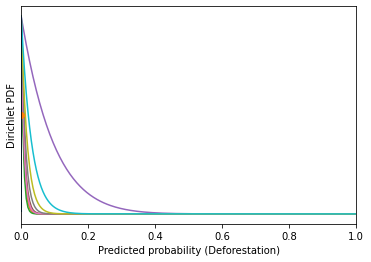

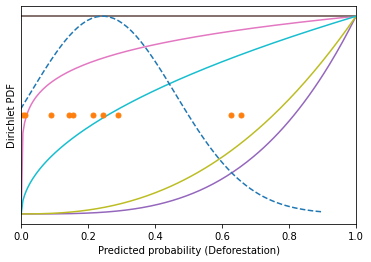

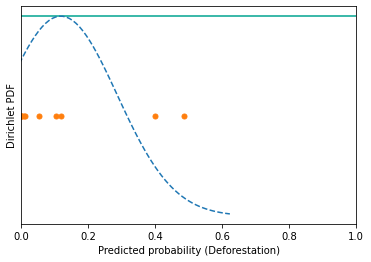

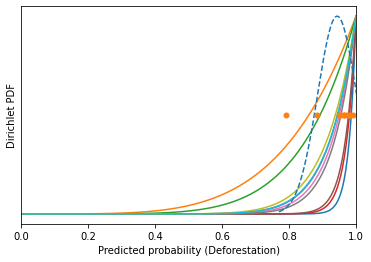

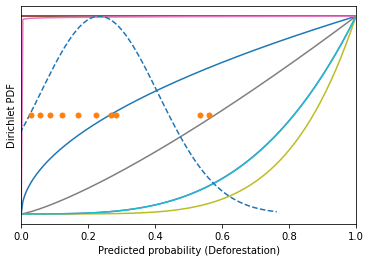

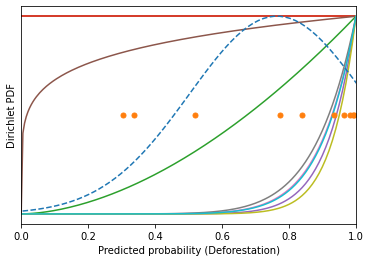

In [14]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))


            
            # getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)
    # plot_norm_pdf(results_ensemble[poi_id]['predicted'])
    # plot_points(results_ensemble[poi_id]['predicted'])
            